<a href="https://colab.research.google.com/github/my-quach/R-AI/blob/main/People.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [5]:
input_shape = (60*60*3,)
model = Sequential([
    Dense(1024, activation='relu', input_shape=input_shape),
    Dropout(0.4),

    Dense(512, activation='relu'),
    Dropout(0.3),

    Dense(256, activation='relu'),
    Dropout(0.2),

    Dense(128, activation='relu'),

    Dense(generator.num_classes, activation='softmax')  # Số class tự động theo dữ liệu
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
!pip install --upgrade tensorflow

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=500, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 1.0729 - val_accuracy: 0.2857 - val_loss: 11.9256
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 910ms/step - accuracy: 1.0000 - loss: 0.0377 - val_accuracy: 0.2857 - val_loss: 28.7824
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 1.0000 - loss: 1.9868e-07 - val_accuracy: 0.2857 - val_loss: 48.1027
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.2857 - val_loss: 69.0389
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.2857 - val_loss: 90.6618
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.2857 - val_loss: 112.2258
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.2857 - val_loss: 133.6350
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 1.0000 - loss: 0.0000e

In [3]:
# Tạo ImageDataGenerator, chuẩn hóa pixel về [0, 1]
datagen = ImageDataGenerator(rescale=1.0/255)

# Load ảnh từ thư mục theo batch
generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/people',
    target_size=(60, 60),       # ✅ đã đổi về 60x60
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)

# Load dữ liệu kiểm tra từ thư mục
test_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/people',
    target_size=(60, 60),       # ✅ resize test về 60x60 luôn
    color_mode='rgb',
    class_mode='categorical',
    batch_size=10000,
    shuffle=False
)

# Tên nhãn tương ứng class
class_labels = ['HURRYKNG', 'Huệ Mỹ', 'J97', 'Wean Lê', 'mintum xinkdep']

# Lấy 1 batch đầu tiên
X_batch, y_batch = next(generator)

# ✅ Flatten ảnh 60x60x3 thành vector (60*60*3 = 10800)
X_batch_flat = X_batch.reshape(X_batch.shape[0], 60*60*3)

print("Input shape for ANN:", X_batch_flat.shape)   # Ví dụ: (32, 10800)
print("Label shape (one-hot):", y_batch.shape)      # Ví dụ: (32, 5)


Found 35 images belonging to 5 classes.
Found 35 images belonging to 5 classes.
Input shape for ANN: (32, 10800)
Label shape (one-hot): (32, 5)


In [4]:
# Load tập test
test_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/people',
    target_size=(60, 60),           # ✅ Dùng ảnh 60x60
    color_mode='rgb',
    class_mode='categorical',
    batch_size=10000,               # Load toàn bộ test 1 lần
    shuffle=False
)

# Lấy toàn bộ dữ liệu từ generator
x_train, y_train = next(generator)
x_test, y_test = next(test_generator)

# Flatten ảnh cho ANN
x_train = x_train.reshape(x_train.shape[0], 60 * 60 * 3)  # ✅ (batch_size, 10800)
x_test = x_test.reshape(x_test.shape[0], 60 * 60 * 3)

# Không cần dùng to_categorical vì generator đã trả về one-hot
print("Train shape:", x_train.shape, y_train.shape)
print("Test shape:", x_test.shape, y_test.shape)


Found 35 images belonging to 5 classes.
Train shape: (3, 10800) (3, 5)
Test shape: (35, 10800) (35, 5)


In [7]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('test_acc:%.2f'%(test_acc*100))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2946 - loss: 473.0525
test_acc:28.57


In [ ]:
generator.class_indices

{'HURRYKNG': 0, 'Huệ Mỹ': 1, 'J97': 2, 'Wean Lê': 3, 'mintum xinkdep': 4}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Dự đoán: HURRYKNG


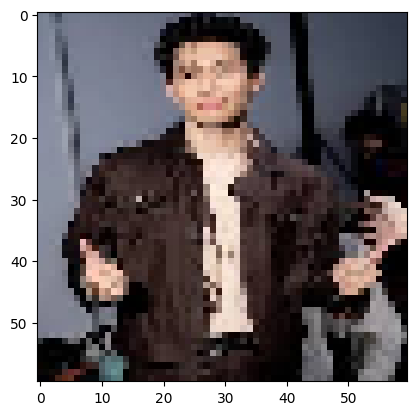

In [8]:

# Load ảnh 60x60
img = load_img('/content/drive/MyDrive/people/HURRYKNG/hrk4.jpg', target_size=(60, 60))
plt.imshow(img)  # Hiển thị ảnh

# Tiền xử lý ảnh
img = img_to_array(img)
img_flatten = img.reshape(1, 60 * 60 * 3)        # ✅ Flatten ảnh 60x60x3 → 1D vector
img_flatten = img_flatten.astype('float32') / 255  # ✅ Normalize về [0,1]

# Dự đoán
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))

# Lấy nhãn class
class_labels = list(generator.class_indices.keys())

# In kết quả
print("Dự đoán:", class_labels[predicted_class_index])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Dự đoán: HURRYKNG


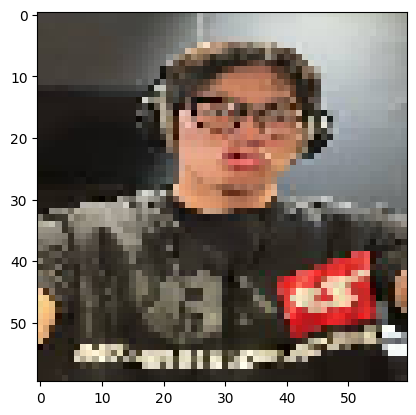

In [9]:
img=load_img('/content/drive/MyDrive/people/HURRYKNG/hrk6.jpg', target_size=(60,60))
plt.imshow(img)
img=img_to_array(img)
img_flatten=img.reshape(1,60*60*3)


# Tiền xử lý ảnh
img = img_to_array(img)
img_flatten = img.reshape(1, 60*60*3)
img_flatten = img_flatten.astype('float32') / 255  # normalize

# Dự đoán
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))

# Lấy nhãn class
class_labels = list(generator.class_indices.keys())

# In kết quả
print("Dự đoán:", class_labels[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Dự đoán: Wean Lê


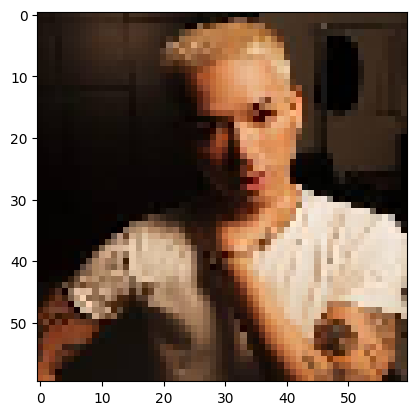

In [ ]:
img=load_img('/content/drive/MyDrive/people/Wean Lê/wean3.jpg', target_size=(60,60))
plt.imshow(img)
img=img_to_array(img)
img_flatten=img.reshape(1,60*60*3)


# Tiền xử lý ảnh
img = img_to_array(img)
img_flatten = img.reshape(1, 60*60*3)
img_flatten = img_flatten.astype('float32') / 255  # normalize

# Dự đoán
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))

# Lấy nhãn class
class_labels = list(generator.class_indices.keys())

# In kết quả
print("Dự đoán:", class_labels[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Dự đoán: HURRYKNG


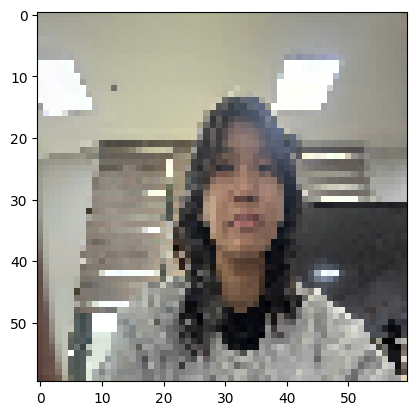

In [ ]:
img=load_img('/content/drive/MyDrive/people/Huệ Mỹ/hmu2.jpg', target_size=(60,60))
plt.imshow(img)
img=img_to_array(img)
img_flatten=img.reshape(1,60*60*3)


# Tiền xử lý ảnh
img = img_to_array(img)
img_flatten = img.reshape(1, 60*60*3)
img_flatten = img_flatten.astype('float32') / 255  # normalize

# Dự đoán
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))

# Lấy nhãn class
class_labels = list(generator.class_indices.keys())

# In kết quả
print("Dự đoán:", class_labels[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Dự đoán: HURRYKNG


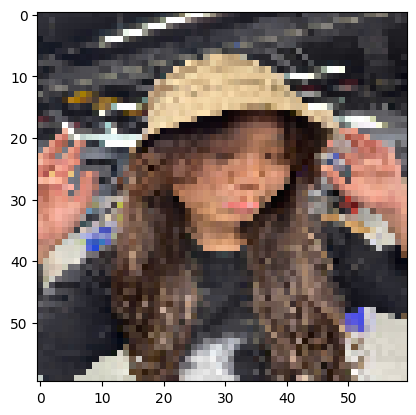

In [ ]:
img=load_img('/content/drive/MyDrive/people/mintum xinkdep/mintum sĩ.jpg', target_size=(60,60))
plt.imshow(img)
img=img_to_array(img)
img_flatten=img.reshape(1,60*60*3)


# Tiền xử lý ảnh
img = img_to_array(img)
img_flatten = img.reshape(1, 60*60*3)
img_flatten = img_flatten.astype('float32') / 255  # normalize

# Dự đoán
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))

# Lấy nhãn class
class_labels = list(generator.class_indices.keys())

# In kết quả
print("Dự đoán:", class_labels[predicted_class_index])

In [ ]:
model.save('train60.h5')